In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [22]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_data = pd.read_csv(train_url)

In [8]:
#Fill NaN in Age with 19 if they don't have any family members
# Assuming that they would be young adult people traveling alone
#Fill NaN in Age with 17 if their family members are 2 or more 
for i,age in enumerate(train_data["Age"]):
    num_fam_members = train_data["Parch"][i] + train_data["SibSp"][i]
    if num_fam_members == 0: 
        train_data["Age"] = train_data["Age"].fillna(19)
    elif num_fam_members >= 2:
        train_data["Age"] = train_data["Age"].fillna(17)

#could have used passengerID, which the value is the same as the index

In [9]:
train_data["Child"] = float("NaN")
train_data.loc[train_data.Age < 18, "Child"] = 1
train_data.loc[train_data.Age >= 18, "Child"] = 0

In [10]:
# make a new dataFrame based on survival
survived_data = train_data[train_data.Survived == 1]

In [12]:
# make a second dataFrame that encompasses those not survived
not_survived_Data = train_data[train_data.Survived == 0]

In [22]:
survived_age = np.asarray(survived_data["Age"])
not_survived_age = np.asarray(survived_data["Age"])

[0, 10, 20, 30, 40, 50, 60, 70, 80]
[0, 10, 20, 30, 40, 50, 60, 70]
[0, 10, 20, 30, 40, 50, 60, 70]
[4.269662921348314, 10.44943820224719, 8.651685393258427, 8.202247191011235, 3.8202247191011236, 2.247191011235955, 0.6741573033707865, 0.11235955056179776]


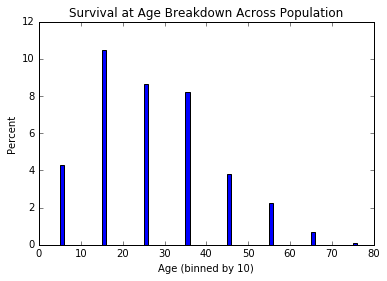

In [20]:
%matplotlib inline
survived_binned, bin_edges = np.histogram(survived_age, bins=[0,10,20,30,40,50,60,70,80])

survived_list = list(survived_binned)
convert_to_float = [float(i) for i in survived_list]

age_percent = [n/890*100 for n in convert_to_float]

bins = list(bin_edges)
print(bins)
bins.pop()
print(bins)
position = [x + 5 for x in bins]
print(bins)

#age_percent = np.divide(x_binned, np.asarray([890]))
print(age_percent)

fig, ax = plt.subplots()

width = 1
chart = ax.bar(position, age_percent, width)
title = "Survival at Age Breakdown Across Population"
y_axis = "Percent"
x_axis = "Age (binned by 10)"
ax.set_title(title)
ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)
plt.show()

[38 93 77 73 34 20  6  1]
[62, 279, 220, 167, 89, 48, 19, 7]
[61.29032258064516, 33.33333333333333, 35.0, 43.712574850299404, 38.20224719101123, 41.66666666666667, 31.57894736842105, 14.285714285714285]


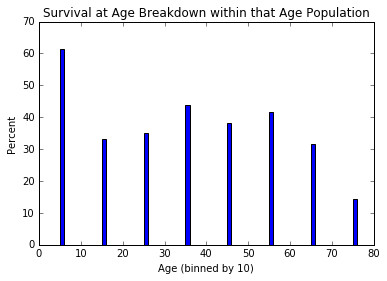

In [32]:
%matplotlib inline
survived_binned, bin_edges = np.histogram(survived_age, bins=[0,10,20,30,40,50,60,70,80])
print(survived_binned)
survived_list = list(survived_binned)
convert_to_float_survived = [float(i) for i in survived_list]

not_survived_binned, bin_edges = np.histogram(not_survived_age, bins=[0,10,20,30,40,50,60,70,80])

not_survived_list = list(survived_binned)
convert_to_float_survived = [float(i) for i in survived_list]

all_ages = np.asarray(train_data["Age"])
all_ages_binned, edges = np.histogram(all_ages, bins=[0,10,20,30,40,50,60,70,80])
all_ages_list = list(all_ages_binned)
convert_to_float_all = [float(i) for i in all_ages_list]
print(all_ages_list)

normalized = []
for s, a in zip(convert_to_float_survived, convert_to_float_all):
    percent = s/a*100
    normalized.append(percent)
    
print(normalized)

fig, ax = plt.subplots()

width = 1
chart = ax.bar(position, normalized, width)
title = "Survival at Age Breakdown within that Age Population"
y_axis = "Percent"
x_axis = "Age (binned by 10)"
ax.set_title(title)
ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)
plt.show()


[38 93 77 73 34 20  6  1]
[  62.  279.  220.  167.   89.   48.   19.    7.]
[ 38.  93.  77.  73.  34.  20.   6.   1.]
[ 61.29032258  33.33333333  35.          43.71257485  38.20224719
  41.66666667  31.57894737  14.28571429]


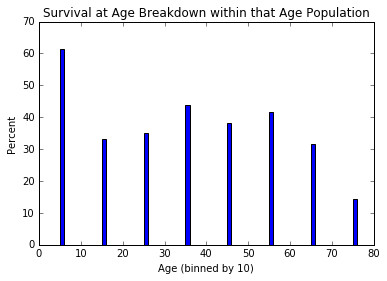

In [37]:
%matplotlib inline
survived_binned, bin_edges = np.histogram(survived_age, bins=[0,10,20,30,40,50,60,70,80])
print(survived_binned)

all_ages = np.asarray(train_data["Age"])
all_ages_binned, edges = np.histogram(all_ages, bins=[0,10,20,30,40,50,60,70,80])

all_ages_float = all_ages_binned.astype(np.float)

survived_ages_float = survived_binned.astype(np.float)

normalized = survived_ages_float/all_ages_float*100

fig, ax = plt.subplots()

width = 1
chart = ax.bar(position, normalized, width)
title = "Survival at Age Breakdown within that Age Population"
y_axis = "Percent"
x_axis = "Age (binned by 10)"
ax.set_title(title)
ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)
plt.show()

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [27]:
#train_data['Age'] = train_data['Age'][(train_data['Parch'] + train_data['SibSp']) == 0].fillna(19, inplace=True)
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']
#train_data['Age'] = train_data.apply(train_data['Age'].fillna(19) if pd.isnull(train_data.Age) and  
                                     #train_data['Family_Size'] == 0 else train_data.Age, axis=1)

for i in train_data[train_data.Age.isnull()].index:
    if train_data.loc[i, 'Family_Size'] == 0:
        train_data.loc[i, 'Age'] = 19   
    elif train_data.loc[i, 'Family_Size'] > 0:
        train_data.loc[i, 'Age'] = 17
        
        
    #else:
        #train_data.loc[i, 'Age'] = train_data.loc[i, 'Age']
        
#for i in df[df.Vals.isnull()].index:
    #df.loc[i, 'Vals'] = means[df.loc[i].Cat]

#df.Vals = df.apply(lambda x: means[x.Cat] if pd.isnull(x.Vals) else x.Vals, axis=1)

In [28]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,19,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,19,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,19,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,19,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1


In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [29]:
fare = np.asarray(train_data['Fare'])

In [33]:
pclass = np.asarray(train_data['Pclass'])

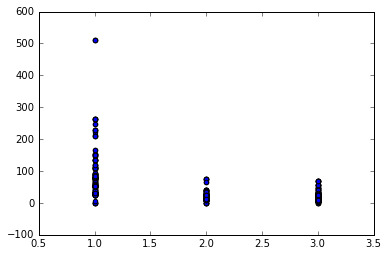

In [35]:
%matplotlib inline
plt.scatter(pclass, fare)
plt.show()

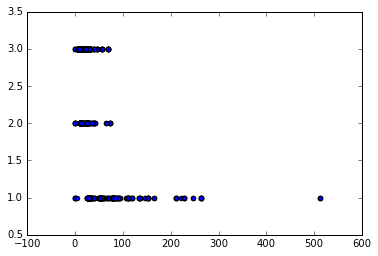

In [36]:
%matplotlib inline
plt.scatter(fare, pclass)
plt.show()

THIRD


(array([   4.,    0.,    1.,    0.,    9.,  263.,   42.,    9.,   10.,
           1.,   24.,   26.,    8.,    6.,   11.,    6.,    7.,    8.,
           4.,    0.,   11.,    0.,   11.,    0.,    4.,    0.,    0.,
           0.,    6.,    0.,    0.,    0.,    0.,    6.,    0.,    0.,
           0.,    0.,    0.,    0.,    7.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    7.]),
 array([  0.   ,   1.391,   2.782,   4.173,   5.564,   6.955,   8.346,
          9.737,  11.128,  12.519,  13.91 ,  15.301,  16.692,  18.083,
         19.474,  20.865,  22.256,  23.647,  25.038,  26.429,  27.82 ,
         29.211,  30.602,  31.993,  33.384,  34.775,  36.166,  37.557,
         38.948,  40.339,  41.73 ,  43.121,  44.512,  45.903,  47.294,
         48.685,  50.076,  51.467,  52.858,  54.249,  55.64 ,  57.031,
         58.422,  59.813,  61.204,  62.595,  63.986,  65.377,  66.768,
         68.159,  69.55 ]),
 <a list of 50 Patch objects>)

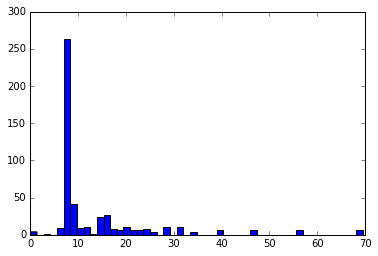

In [43]:
%matplotlib inline
third_class = train_data[train_data.Pclass == 3]
third_fare = np.asarray(third_class['Fare'])
print 'THIRD'
plt.hist(third_fare, bins=50)

SECOND


(array([  6.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,  50.,  10.,   5.,
          0.,   3.,   2.,   6.,   4.,   2.,  35.,   6.,   2.,   3.,   0.,
          4.,   0.,   0.,   4.,   4.,   0.,   3.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   5.]),
 array([  0.  ,   1.47,   2.94,   4.41,   5.88,   7.35,   8.82,  10.29,
         11.76,  13.23,  14.7 ,  16.17,  17.64,  19.11,  20.58,  22.05,
         23.52,  24.99,  26.46,  27.93,  29.4 ,  30.87,  32.34,  33.81,
         35.28,  36.75,  38.22,  39.69,  41.16,  42.63,  44.1 ,  45.57,
         47.04,  48.51,  49.98,  51.45,  52.92,  54.39,  55.86,  57.33,
         58.8 ,  60.27,  61.74,  63.21,  64.68,  66.15,  67.62,  69.09,
         70.56,  72.03,  73.5 ]),
 <a list of 50 Patch objects>)

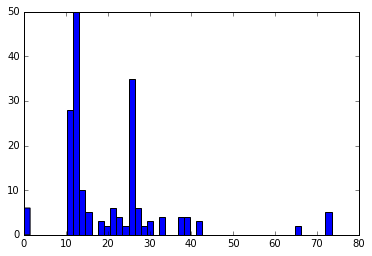

In [44]:
second_class = train_data[train_data.Pclass == 2]
second_fare = np.asarray(second_class['Fare'])
print 'SECOND'
plt.hist(second_fare, bins=50)


FIRST


(array([  6.,   0.,  48.,  17.,   7.,  32.,   9.,  24.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([   0.      ,   10.246584,   20.493168,   30.739752,   40.986336,
          51.23292 ,   61.479504,   71.726088,   81.972672,   92.219256,
         102.46584 ,  112.712424,  122.959008,  133.205592,  143.452176,
         153.69876 ,  163.945344,  174.191928,  184.438512,  194.685096,
         204.93168 ,  215.178264,  225.424848,  235.671432,  245.918016,
         256.1646  ,  266.411184,  276.657768,  286.904352,  297.150936,
         307.39752 ,  317.644104,  327.890688,  338.137272,  348.383856,
         358.63044 ,  368.877024,  379.123608,  389.370192,  399.616776,
         409.86336 ,  420.109944,  430.356528,  440.603112,  450.849696,
 

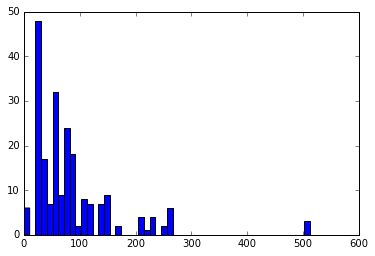

In [45]:

first_class = train_data[train_data.Pclass == 1]
first_fare = np.asarray(first_class['Fare'])
print 'FIRST'
plt.hist(first_fare, bins=50)